<br><br>

<center>
<h1>Statsmodels package</h1>
<br>
<h3>Advanced Business Analytics (CIS442D/85)</h3>
<h3>Simon Business School</h3>
</center> 

<center>
Group Members: Alder Martinez - Arfiadhi Nugratama - Andrew Tu - Wang Minli
</center> 
<br>
___

<h1>Motivation</h1>
Working in the analytics field makes explore data, estimate statistical models, and perform statistical tests become one of your daily tasks. This python package provides an extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics to help you with this tasks. 

Some of the features this package include are:

    Linear regression models
    Generalized linear models
    Many models and functions for time series analysis
    Nonparametric estimators
    A wide range of statistical tests

<h1> Context </h1>

Linear Regression Models:

        -A simple linear model with independently and homoskedasticity error (same distribution of error) and heteroskedasticity error (different error distribution) or autocorrelation.
        
        -This module is useful to measure Ordinary Least Square (OLS), Weighted Least Square (WLS), Generalized Least Square (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.
        
Alternative solution for Linear Regression Models:

        -In Python, we can use other package such as sklearn with linear_model module to calculate similar result.
        -In R programming language, we can use a simple function lm to calculate the linear model calculation.
        -Excel also able to measure linear model by using regression in data analysis toolkit.
        
Time Series Analysis with Auto Regressive Moving Average (ARMA) Model:
        
        -Typically used for forecasting model.
        -ARMA models combine autocorrelation methods (AR) where value today depens on previous values and moving averages (MA) where value today depends on previous erros, into a composite model of the time series.
            
Alternative solution for ARMA Model:
        
        -In R programming language, we can measure ARMA model using arima function.
        -Using other software tool such as EViews.
        
Nonparametric Function; Univariate Kernel Density Estimator:

    -   Univariate data estimation uses FFT transforms, which make it fast.
    -	Preferred for continuous and univariate data if speed is taken as consideration.
    -	Bandwidth estimation is done by rule of thumb.
    -   Used to estimate the probability density function f(x) of a random variable X.
    -	This is a data smoothing problem which inferences about the population are made on a finite data sample.
    -	This technique used in inference procedures such as signal processing, data mining, and econometrics.
        Alternative solution for Univariate Kernel Density Estimator
    -	Using R programming language with function called kedd.
    -	Other software such as SAS with PROC UNIVARIATE


<h1> Installation</h1>

To get the latest release using pip

    pip install statsmodels --upgrade-strategy only-if-needed

The additional parameter pip --upgrade-strategy only-if-needed will ensure
that dependencies, e.g. NumPy or pandas, are not upgraded unless required.

<h3> Dependencies</h3>

You need to have installed the following packages to use Statsmodels:

python >= 2.7

    www.python.org

numpy >= 1.8

    www.numpy.org

scipy >= 0.14
    
    www.scipy.org

pandas >= 0.14

    pandas.pydata.org

patsy >= 0.3.0

    patsy.readthedocs.org

cython >= 0.24

    http://cython.org/
    
<h3>Optional Dependencies</h3>

The following packages are not mandatory to use Statsmodels but can help you on your analysis:

X-12-ARIMA or X-13ARIMA-SEATS

    http://www.census.gov/srd/www/x13as/

matplotlib >= 1.3

    http://matplotlib.org/

sphinx >= 1.3

    http://sphinx.pocoo.org/

nose >= 1.3

    http://readthedocs.org/docs/nose/en/latest/

IPython >= 3.0

    Needed to build the docs.


<h1>Minimal Working Examples</h1>


In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from __future__ import print_function
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.distributions.mixture_rvs import mixture_rvs

<br>
Using R-style formulas together with pandas data frames to fit your models. </br>
<br>Here is a simple example using ordinary least squares:</br>

In [3]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 17 Feb 2017   Prob (F-statistic):           1.90e-08
Time:                        17:18:55   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

<br><br>
You can also use numpy arrays instead of formulas:
<br><br>

In [5]:
# Generate artificial data (2 regressors + constant)
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     26.71
Date:                Fri, 17 Feb 2017   Prob (F-statistic):           5.74e-10
Time:                        17:29:48   Log-Likelihood:                -14.537
No. Observations:                 100   AIC:                             35.07
Df Residuals:                      97   BIC:                             42.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4253      0.072     19.669      0.0


<h1>Examples of typical use-cases</h1>


### (1)Ordinary Least Squares
### OLS estimation

In [7]:
#Artificial data:

nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [ ]:
#Our model needs an intercept, so we add a column of 1s:

X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [8]:
#Fit and summary:

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     329.1
Date:                Sun, 19 Feb 2017   Prob (F-statistic):           3.27e-44
Time:                        15:44:09   Log-Likelihood:                -101.00
No. Observations:                 100   AIC:                             206.0
Df Residuals:                      98   BIC:                             211.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7390      0.046     15.933      0.0

## (2)Autoregressive Moving Average (ARMA)

In [9]:
#Employ Sunspots data as example.
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [14]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]


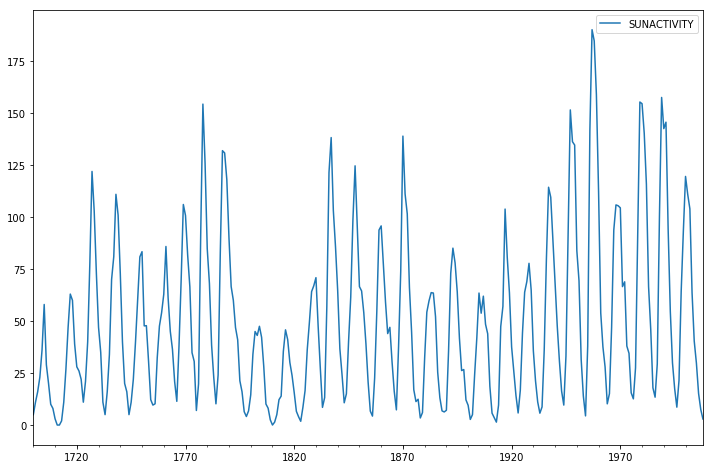

In [18]:
dta.plot(figsize=(12,8))
plt.show()

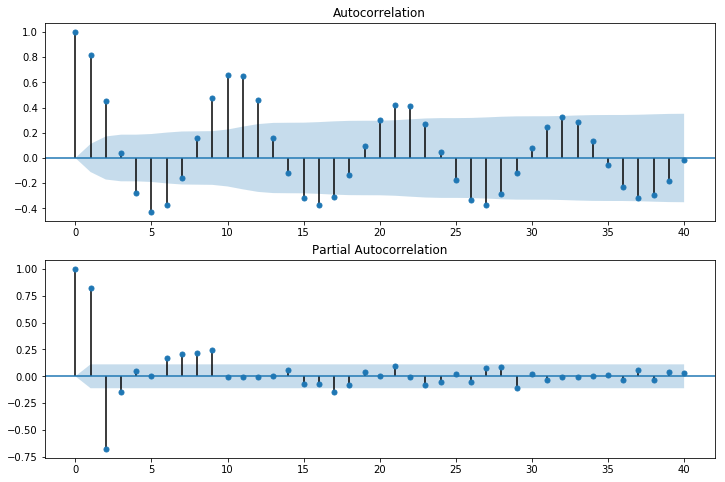

In [22]:
#Present the correlation in the time series data. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [23]:
#Fit the data to ARMA and present the parameters.
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print(arma_mod20.params)

const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [25]:
#Creat another ARMA model with differnt length.
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()
print(arma_mod30.params)

const                49.749935
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [26]:
#Comapre the likelihood between them.
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6363380639814 2637.56970317 2628.60672591


In [27]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.4036286964474 2638.07033508 2626.8666135


# (3)Kernel Density Estimation

## Univariate Example

In [34]:
np.random.seed(12345)

obs_dist1 = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))
kde = sm.nonparametric.KDEUnivariate(obs_dist1)
kde.fit()

/Users/andrewtu/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


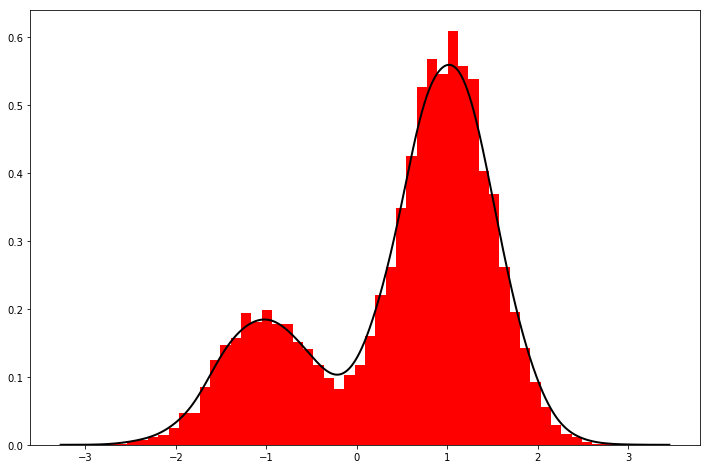

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist1, bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black');
plt.show()

In [38]:
obs_dist2 = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.beta],
            kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=1,args=(1,.5))))

kde2 = sm.nonparametric.KDEUnivariate(obs_dist2)
kde2.fit()

/Users/andrewtu/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


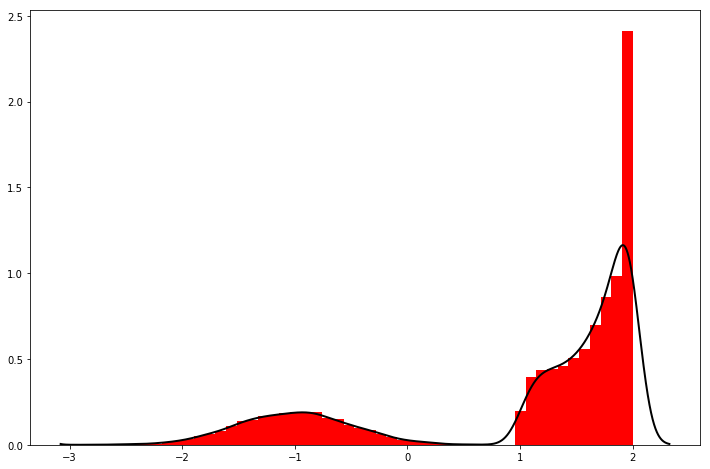

In [41]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist2, bins=50, normed=True, color='red')
ax.plot(kde2.support, kde2.density, lw=2, color='black');
plt.show()

- The fitted KDE object is a full non-parametric distribution.

In [43]:
obs_dist3 = mixture_rvs([.25,.75], size=1000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))
kde3 = sm.nonparametric.KDEUnivariate(obs_dist3)
kde3.fit()

/Users/andrewtu/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


## CDF

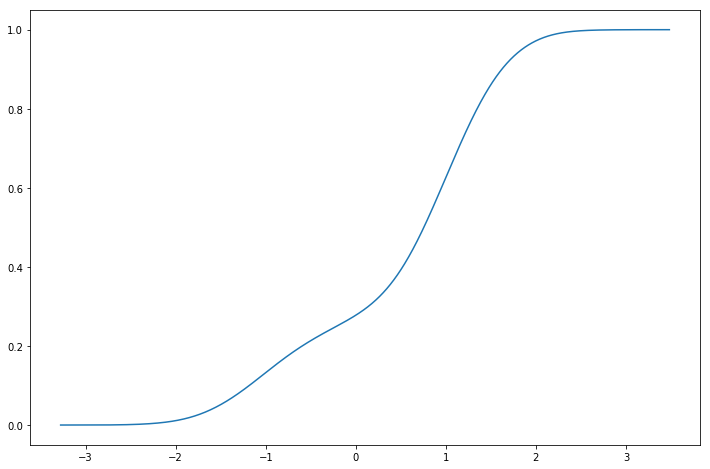

In [45]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde3.support, kde3.cdf);
plt.show()

## Cumulative Hazard Function

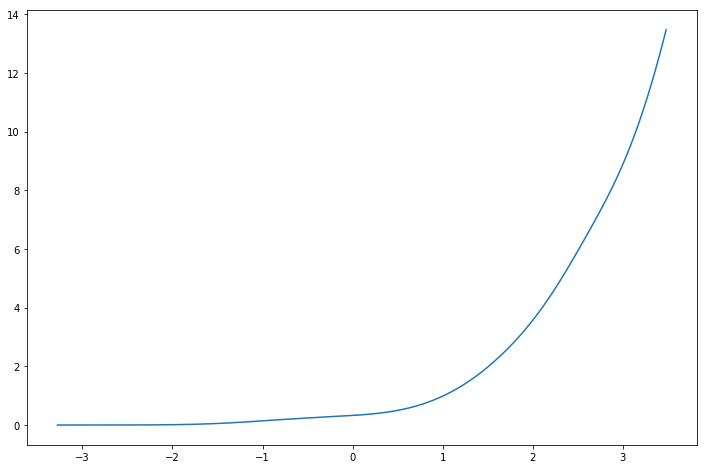

In [46]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde3.support, kde3.cumhazard);
plt.show()






## List of other interesting and useful features(additional examples are not required:

    -Robuts linear models.
    -Linear Mixed Effects Models: regression analysis involving dependant data.
    -Survival and Duration Analysis.
    -Regression with Discrete Dependant Variable
    -Plotting function
    -Empirical Likelihood
    -Generalized Method Moments






## Summary


   Statsmodels focuses on data analysis, datascience and statistics and is used for data exploration, data estimation and testing.It is built on top of the numerical libraries NumPy and SciPy, integrates with Pandas for data handling and uses Patsy for an R-like formula interface. Graphical functions are based on the Matplotlib library.It provides the statistical backend for other Python libraries.
   
   As an analyst, we can use statsmodels package to do various kinds of regression and estimatation. In the example provided above, we can do OLS estimation for estimating the unknown parameters in a linear regression model, and Autoregressive Moving Average (ARMA) for predicting future values in time series. We also use kernel density estimation (KDE) to estimate the probability density function of a random variable.
   
   Compared to sklearn and pandas, statsmodels has the lowest developement activity and longest release cycle of the three. However, it has a time series analysis part covering AR, ARMA and VAR (vector autoregressive) regression, which are not available in any other python package. The three packages are complementary to each other since they cover different areas, have different main objectives, or emphasize different areas in machine learning and statistics.
   
    - pandas is mainly a package to handle and operate directly on data.
    - scikit-learn is doing machine learning with emphasis on predictive modeling with often large and sparse data
    - statsmodels is doing "traditional" statistics and econometrics, with much stronger emphasis on parameter
    estimation and (statistical) testing.

## References

    - https://en.wikipedia.org/wiki/Statsmodels
    - http://www.statsref.com/HTML/index.html?arima.html
    - http://statsmodels.sourceforge.net/
    - https://cran.r-project.org/web/packages/kedd/vignettes/kedd.pdf
    - http://blogs.sas.com/content/iml/2016/07/27/visualize-kernel-density-estimate.html